# Census Income

**Project Description:**

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
A single cell estimate of the population 16+ for each state.
Controls for Hispanic Origin by age and sex.
Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv


In [50]:
# IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as sp

In [51]:
# read & store the data in DF

df_raw = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df_raw.head(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


# NON-GRAPHICAL ANALYSIS

In [52]:
# Shape of dataset

print(df_raw.shape)

# Unique values, datatype, Null Count

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique(), ', type:',df_raw[index].dtype, ', null count:', df_raw[index].isnull().sum())

(32560, 15)
Age : 73 , type: int64 , null count: 0
Workclass : 9 , type: object , null count: 0
Fnlwgt : 21647 , type: int64 , null count: 0
Education : 16 , type: object , null count: 0
Education_num : 16 , type: int64 , null count: 0
Marital_status : 7 , type: object , null count: 0
Occupation : 15 , type: object , null count: 0
Relationship : 6 , type: object , null count: 0
Race : 5 , type: object , null count: 0
Sex : 2 , type: object , null count: 0
Capital_gain : 119 , type: int64 , null count: 0
Capital_loss : 92 , type: int64 , null count: 0
Hours_per_week : 94 , type: int64 , null count: 0
Native_country : 42 , type: object , null count: 0
Income : 2 , type: object , null count: 0


<Axes: >

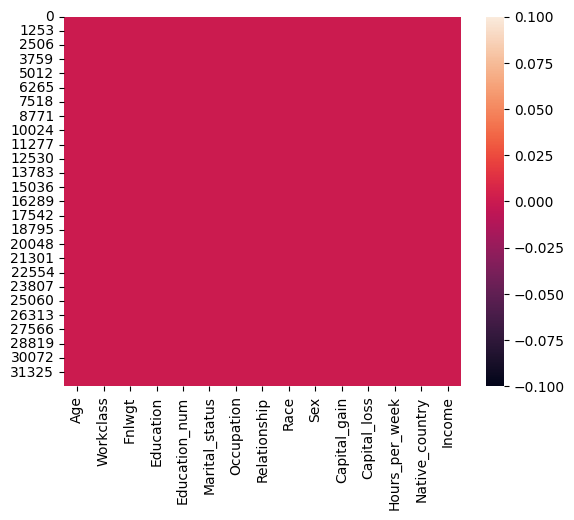

In [53]:
# Visualize using heatmap

sns.heatmap(df_raw.isnull())

**No null values**

**Encoding the object datatype**

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for index in df_raw.columns.to_list():

  if df_raw[index].dtype == object:
    df_raw[index] = le.fit_transform(df_raw[index])

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique(), ', type:',df_raw[index].dtype)

df_raw.head(2)

Age : 73 , type: int64
Workclass : 9 , type: int64
Fnlwgt : 21647 , type: int64
Education : 16 , type: int64
Education_num : 16 , type: int64
Marital_status : 7 , type: int64
Occupation : 15 , type: int64
Relationship : 6 , type: int64
Race : 5 , type: int64
Sex : 2 , type: int64
Capital_gain : 119 , type: int64
Capital_loss : 92 , type: int64
Hours_per_week : 94 , type: int64
Native_country : 42 , type: int64
Income : 2 , type: int64


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0


# GRAPHICAL ANALYSIS - UNIVARIATE

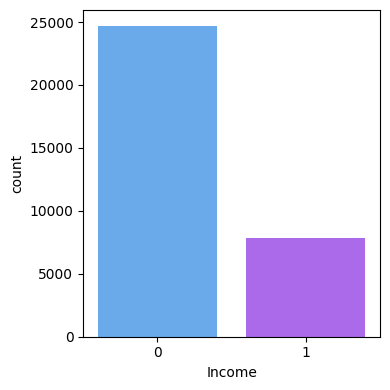

In [55]:
# CHECKING COUNT DISTRIBUTION OF Income

mp.figure(figsize=(4,4))
sns.countplot(x=df_raw['Income'], palette = 'cool')
mp.xlabel('Income')
mp.tight_layout()
mp.show()

**DATA IS IMBALANCED**

In [56]:
# Applying SMOTE TO BALANCE THE DATA

# Import & apply SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=3)
X = df_raw.drop('Income', axis =1, inplace = False)
y = df_raw['Income']

print(X.shape)
print(y.shape)

X_resampled, y_resampled = smote.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)

df_in_bal = pd.DataFrame(data = X_resampled, columns = df_raw.columns.to_list())
df_in_bal['Income'] = y_resampled

print(df_in_bal.shape)
df_in_bal.head(2)

(32560, 14)
(32560,)
(49438, 14)
(49438,)
(49438, 15)


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0


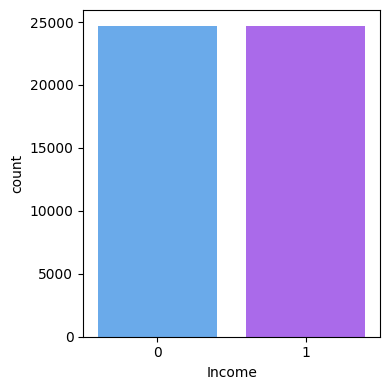

In [57]:
# CHECKING COUNT DISTRIBUTION OF Income AFTER BALANCING

mp.figure(figsize=(4,4))
sns.countplot(x=df_in_bal['Income'], palette = 'cool')
mp.xlabel('Income')
mp.tight_layout()
mp.show()

*Balanced the data*

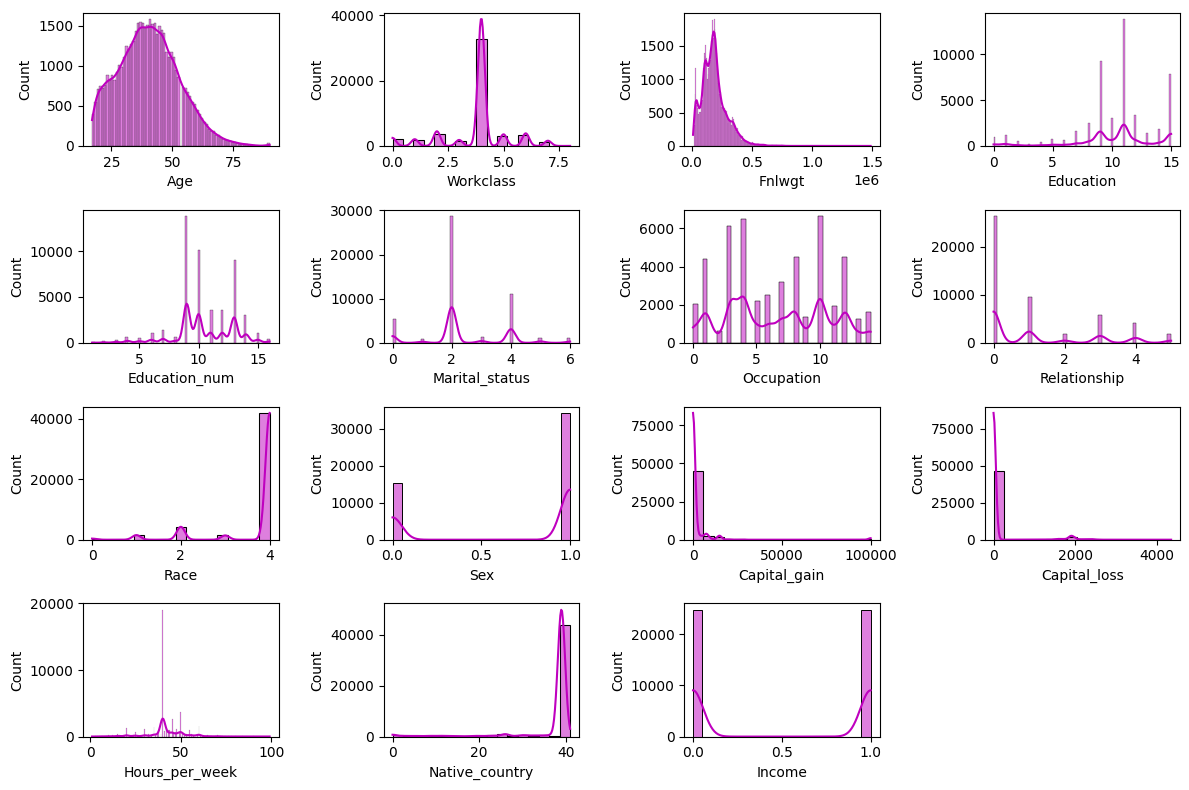

In [58]:
# CHECKING HISTOGRAM FOR BALANCED DATA

mp.figure(figsize=(12,8))
pnum = 1

for index in df_in_bal.columns.to_list():
  if(pnum<=16):
    ax = mp.subplot(4,4, pnum)
    sns.histplot(df_in_bal[index], kde = True, color = 'm')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

*Few continous labels have slight skewness & Std. Dev*

In [59]:
# CHECK STD. DEV

df_in_bal.std()

Age                   12.427753
Workclass              1.362603
Fnlwgt            104137.145646
Education              3.420442
Education_num          2.443094
Marital_status         1.321393
Occupation             3.956292
Relationship           1.531703
Race                   0.814777
Sex                    0.461731
Capital_gain       10605.190965
Capital_loss         478.669560
Hours_per_week        11.484151
Native_country         7.320033
Income                 0.500005
dtype: float64

*Applying Robust Scaler to Normalize the data*

In [60]:
# Applying Robust Scaler to treat Std. Dev

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# Apply Scaling on Continous labels

col_to_scale = ['Age','Fnlwgt','Capital_gain','Capital_loss', 'Hours_per_week']

df_in_dta = df_in_bal[col_to_scale]
df_in_sca = pd.DataFrame(scaler.fit_transform(df_in_bal),columns = df_in_bal.columns.to_list())

df_in_sca.reset_index(drop=True, inplace=True)

df_in_bal['Age'] = df_in_sca['Age']
df_in_bal['Fnlwgt'] = df_in_sca['Fnlwgt']
df_in_bal['Capital_gain']  = df_in_sca['Capital_gain']
df_in_bal['Capital_loss']   = df_in_sca['Capital_loss']
df_in_bal['Hours_per_week']  = df_in_sca['Hours_per_week']

df_in_bal.std()

Age                   0.690431
Workclass             1.362603
Fnlwgt                0.889958
Education             3.420442
Education_num         2.443094
Marital_status        1.321393
Occupation            3.956292
Relationship          1.531703
Race                  0.814777
Sex                   0.461731
Capital_gain      10605.190965
Capital_loss        478.669560
Hours_per_week        1.435519
Native_country        7.320033
Income                0.500005
dtype: float64

**Visualize outliers using Boxplot**

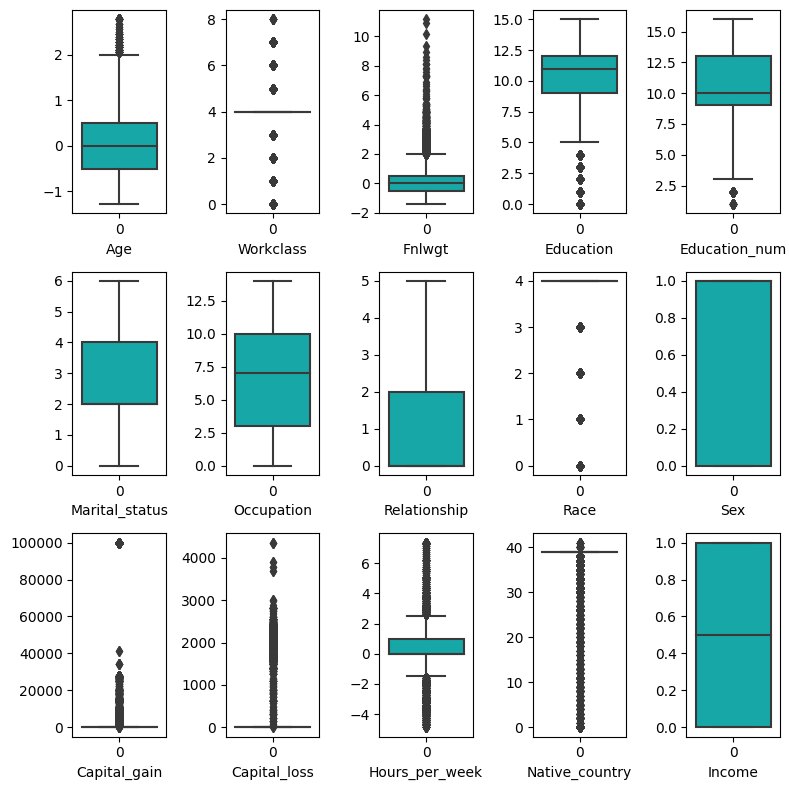

In [61]:
# Visualize Outliers using Box-Plot

mp.figure(figsize=(8,8))
pnum = 1

for index in df_in_bal.columns.to_list():
  if(pnum<=15):
    ax = mp.subplot(3,5, pnum)
    sns.boxplot(df_in_bal[index], color = 'c')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

*Few outliers present in some labels*

(40059, 15)
(40059, 15)


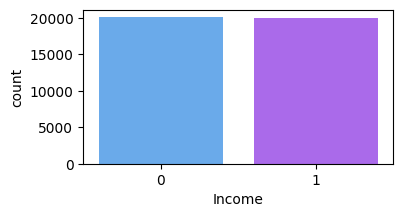

0    20125
1    19934
Name: Income, dtype: int64


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
708,-0.333333,4,0.098373,9,13,4,10,3,4,0,0.0,0.0,0.0,39,0
18815,1.722222,7,-1.291971,14,15,2,8,0,4,1,0.0,0.0,-1.5,39,0
24118,0.111111,1,2.417900,15,10,2,1,0,4,1,0.0,0.0,0.0,39,1


In [62]:
# Removing Outliers where |Z-score| > 3
# With fraud_reported as target

df_in_ft = df_in_bal.drop('Income', axis =1 , inplace = False)
df_in_tg = df_in_bal['Income']

df_in_fil = df_in_bal[(np.abs(sp.zscore(df_in_ft)) <= 3).all(axis=1)]
df_in_fil.reset_index(drop=True, inplace=True)


print(df_in_fil.shape)
print(df_in_fil.shape)

mp.figure(figsize=(4,2))
sns.countplot(x = df_in_fil['Income'], palette = 'cool')
mp.show()

print(df_in_fil['Income'].value_counts())
df_in_fil.sample(3)

Removed Outliers, data is close to balanced, check std Dev

In [63]:
# Check Skewness

df_in_fil.skew()

Age                0.237305
Workclass         -0.710733
Fnlwgt             0.627546
Education         -0.792381
Education_num     -0.092421
Marital_status     0.285164
Occupation         0.102526
Relationship       1.107253
Race              -2.646572
Sex               -0.800246
Capital_gain       3.642335
Capital_loss      15.033196
Hours_per_week    -0.313094
Native_country    -5.134572
Income             0.009536
dtype: float64

*Skewness in Capital_gain, Capital_loss*

In [64]:
# Apply cbrt to remove skewness

df_in_fil['Capital_gain'] = np.cbrt(df_in_fil['Capital_gain'])
df_in_fil['Capital_loss'] = np.cbrt(df_in_fil['Capital_loss'])

df_in_fil.skew()

Age                0.237305
Workclass         -0.710733
Fnlwgt             0.627546
Education         -0.792381
Education_num     -0.092421
Marital_status     0.285164
Occupation         0.102526
Relationship       1.107253
Race              -2.646572
Sex               -0.800246
Capital_gain       2.376789
Capital_loss      13.731995
Hours_per_week    -0.313094
Native_country    -5.134572
Income             0.009536
dtype: float64

In [65]:
# Check Std Dev

df_in_fil.std()

Age               0.669637
Workclass         1.345603
Fnlwgt            0.799021
Education         3.089508
Education_num     2.174717
Marital_status    1.330076
Occupation        3.968029
Relationship      1.532537
Race              0.578607
Sex               0.464227
Capital_gain      6.948899
Capital_loss      0.769877
Hours_per_week    1.271820
Native_country    2.896311
Income            0.500001
dtype: float64

**Std Dev is now within acceptable limits**

**Skewness is slightly high for capital_gain, capital_loss**

# GRAPHICAL ANALYSIS - BIVARIATE

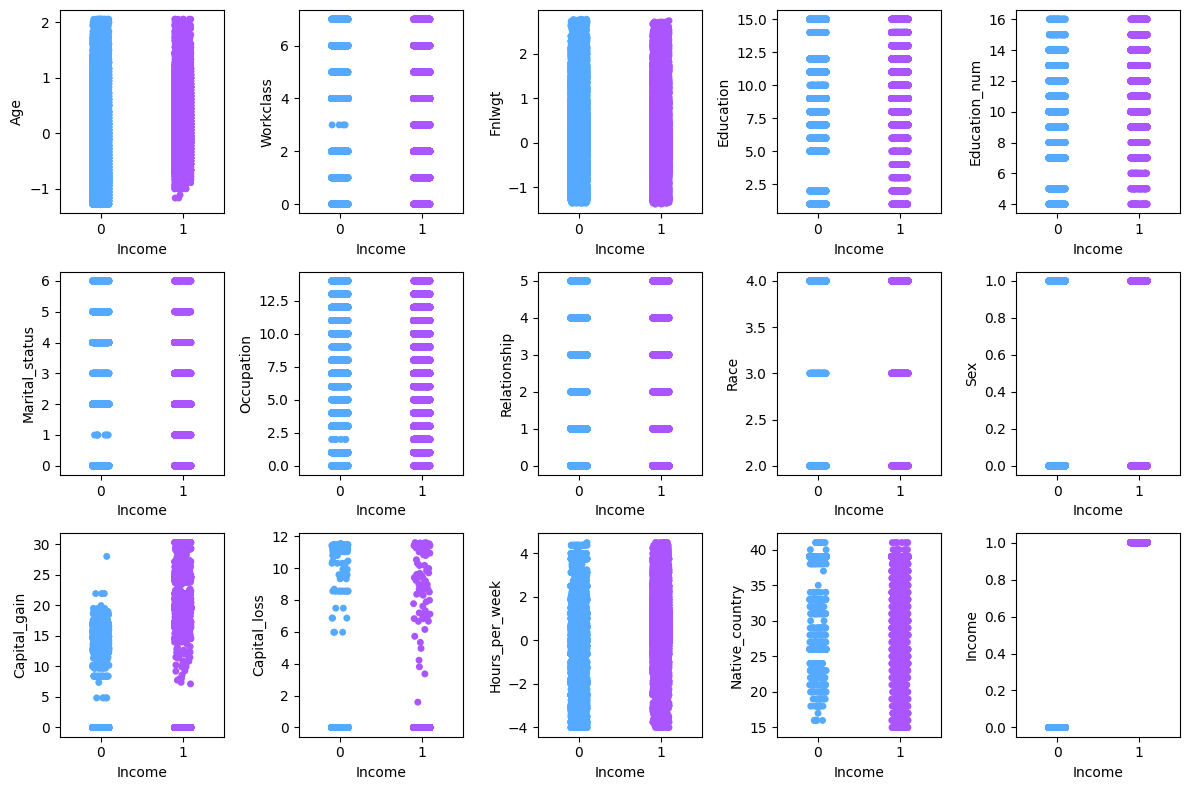

In [66]:
# Stripplot wrt income

mp.figure(figsize=(12,8))
pnum = 1

for index in df_in_fil.columns.to_list():
  if(pnum<=16):
    ax = mp.subplot(3,5, pnum)
    sns.stripplot(x=df_in_fil['Income'], y =df_in_fil[index], palette = 'cool')
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Income < 50K is having low distribution at few of Native_country

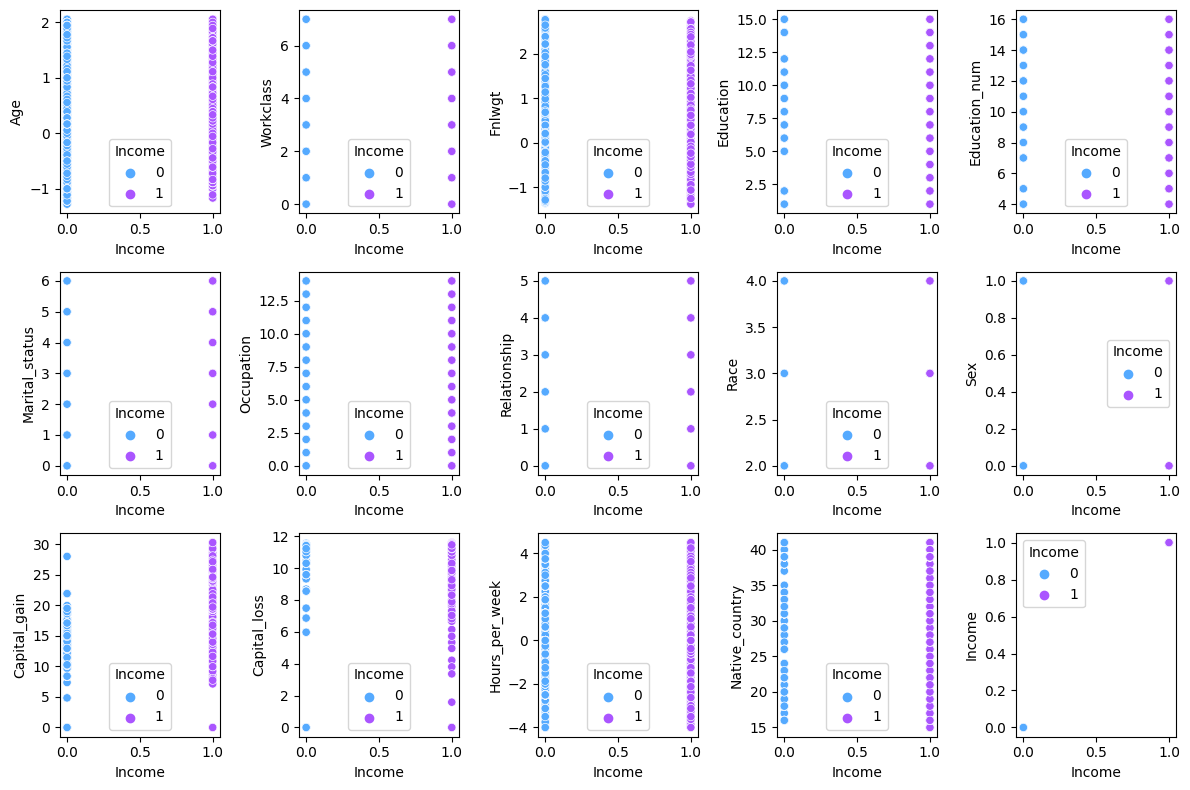

In [67]:
# Scatterplot wrt to price range

mp.figure(figsize=(12,8))
pnum = 1

for index in df_in_fil.columns.to_list():
  if(pnum<=15):
    ax = mp.subplot(3,5, pnum)
    sns.scatterplot(x=df_in_fil['Income'], y =df_in_fil[index], palette = 'cool', hue = df_in_fil['Income'])
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

# GRAPHICAL ANALYSIS - MULTI VARIATE

<Axes: >

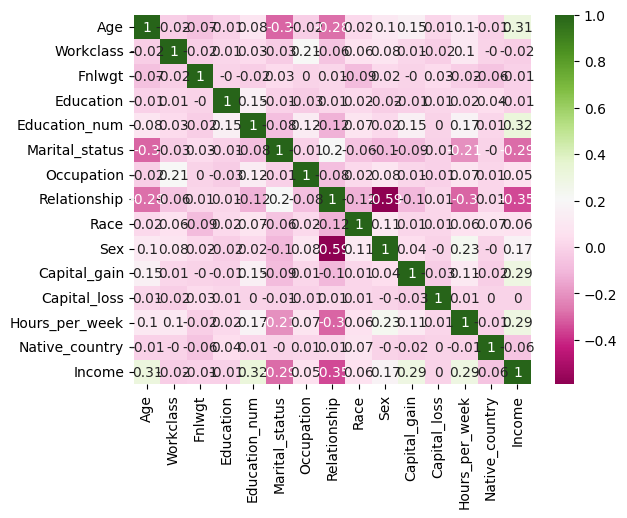

In [68]:
# Heat Map to check correlation among various labels

sns.heatmap(round(df_in_fil.corr(),2), cmap = 'PiYG', annot = True)

No Substantial Correlation

In [69]:
# CHECKING MULIT-COLLINEARITY USING VIF

# Separating Target label Price range

df_in_vf = df_in_fil.drop('Income', axis =1 , inplace = False)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df_in_fil.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_in_fil.values,i) for i in range(len(df_in_fil.columns))]

vif

,Feature,VIF Val
0,Age,1.226499
1,Workclass,9.431638
2,Fnlwgt,1.019187
3,Education,12.984878
4,Education_num,27.578987
5,Marital_status,4.800046
6,Occupation,4.041967
7,Relationship,2.738758
8,Race,40.474867
9,Sex,4.900191


In [70]:
# High VIF in Is Native_country, dropping

df_in_vf.drop('Native_country', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_in_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_in_vf.values,i) for i in range(len(df_in_vf.columns))]

vif

,Feature,VIF Val
0,Age,1.181198
1,Workclass,9.098736
2,Fnlwgt,1.018343
3,Education,12.169905
4,Education_num,21.876539
5,Marital_status,4.517269
6,Occupation,4.025250
7,Relationship,2.498890
8,Race,26.344909
9,Sex,4.706762


In [71]:
#High VIF in Race, dropping

df_in_vf.drop('Race', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_in_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_in_vf.values,i) for i in range(len(df_in_vf.columns))]

vif

,Feature,VIF Val
0,Age,1.176451
1,Workclass,8.434309
2,Fnlwgt,1.014763
3,Education,11.306208
4,Education_num,16.383902
5,Marital_status,4.399152
6,Occupation,4.015346
7,Relationship,2.424430
8,Sex,4.345020
9,Capital_gain,1.205587


In [72]:
# High VIF in Education_num, dropping

df_in_vf.drop('Education_num', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_in_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_in_vf.values,i) for i in range(len(df_in_vf.columns))]

vif

,Feature,VIF Val
0,Age,1.157641
1,Workclass,7.772587
2,Fnlwgt,1.014763
3,Education,7.994757
4,Marital_status,4.208335
5,Occupation,3.816659
6,Relationship,2.364658
7,Sex,4.171496
8,Capital_gain,1.175113
9,Capital_loss,1.007909


**VIFS are now under acceptable limits**

In [73]:
# Check Std Dev

df_in_vf.std()

Age               0.669637
Workclass         1.345603
Fnlwgt            0.799021
Education         3.089508
Marital_status    1.330076
Occupation        3.968029
Relationship      1.532537
Sex               0.464227
Capital_gain      6.948899
Capital_loss      0.769877
Hours_per_week    1.271820
dtype: float64

# MODELING

In [74]:
# SEPARATE FEATURE & TARGET LABELS
# SEPARATE TRAIN & TEST SAMPLES

x_df = df_in_vf
y_df = df_in_fil['Income']

# Import Libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

print(x_df.shape)
print(y_df.shape)

print(x_df.sample(3))
print(y_df.sample(3))

(40059, 11)
(40059,)
            Age  Workclass    Fnlwgt  Education  Marital_status  Occupation  \
30026 -0.055556          2  0.252561         10               0           7   
30796 -0.333333          2  0.545031         13               2           3   
27067 -0.722222          4  0.211523          9               2          10   

       Relationship  Sex  Capital_gain  Capital_loss  Hours_per_week  
30026             0    1           0.0           0.0            2.00  
30796             0    1           0.0           0.0            1.75  
27067             0    1           0.0           0.0            0.00  
29463    1
25573    0
8429     0
Name: Income, dtype: int64


**RANDOM FOREST CLASSIFIER**

In [75]:
# HYPERTUNING PARAMETERS

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_rfc = randomCV.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_split': 5, 'random_state': 91}


In [76]:
# Training the RFC Model with given best hypertuning parameters

RFC = RandomForestClassifier(criterion = bp_rfc['criterion'], max_depth = bp_rfc['max_depth'], max_features = bp_rfc['max_features'], min_samples_split = bp_rfc['min_samples_split'], random_state =bp_rfc['random_state'])
max_acc = 0
max_rand_st = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  RFC.fit(x_train, y_train)
  pred = RFC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

rst_rfc = max_rand_st

print('Best Random State:', rst_rfc, 'with accuracy score:', max_acc)

Best Random State: 70 with accuracy score: 0.8936595107338992


**EXTRA TREES CLASSIFIERS**

In [77]:
# Hypertuning Parameters

from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(etc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_etc = randomCV.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 14, 'min_samples_split': 7, 'random_state': 93}


In [78]:
# Training the ETC  Model with given best hypertuning parameters
ETC = ExtraTreeClassifier(criterion = bp_etc['criterion'], max_depth = bp_etc['max_depth'], max_features = bp_etc['max_features'], min_samples_split = bp_etc['min_samples_split'], random_state = bp_etc['random_state'] )
max_acc = 0
max_rand_st = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  ETC.fit(x_train, y_train)
  pred = ETC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 35 with accuracy score: 0.8555916125811283


**DECISION TREE CLASSIFIERS**

In [79]:
# Hypertuning Parameters

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(dtc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_dtc = randomCV.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 13, 'min_samples_split': 4, 'random_state': 77}


In [80]:
# Training the DTC  Model with given best hypertuning parameters

DTC = DecisionTreeClassifier(criterion = bp_dtc['criterion'], max_depth = bp_dtc['max_depth'], max_features = bp_dtc['max_features'], min_samples_split = bp_dtc['min_samples_split'], random_state = bp_dtc['random_state'] )
max_acc = 0
max_rand_st = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  DTC.fit(x_train, y_train)
  pred = DTC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 70 with accuracy score: 0.8508487269096355


**KNN**

In [81]:
# Hypertuning Parameters

from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

param = {"n_neighbors": [3,5,7],
   "weights": ['uniform', 'distance'],
   "p": [1,2]}

samples = 8
randomCV = RandomizedSearchCV(knc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_knc = randomCV.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 7}


In [82]:
# Training KNN Model

max_acc = 0
max_rand_st = 0
KNN = KNeighborsClassifier(weights = bp_knc['weights'], p = bp_knc['p'], n_neighbors = bp_knc['n_neighbors'])

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 66 with accuracy score: 0.8754368447329006


**ADABOOST**

In [83]:
# Hypertuning Parameters

from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

param = {"n_estimators": sp_randint(1, 100),
   "learning_rate": sp_randint(1, 15),
   "algorithm": ['SAMME.R', 'SAMME'],
    "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(abc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_abc = randomCV.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 50, 'random_state': 9}


In [84]:
# Training ABC Model

max_acc = 0
rst_abc = 0
ABC = AdaBoostClassifier(n_estimators = bp_abc['n_estimators'], learning_rate = bp_abc['learning_rate'],
                         algorithm = bp_abc['algorithm'],random_state = bp_abc['random_state'] )

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  ABC.fit(x_train, y_train)
  pred = ABC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_abc = i

print('Best Random State:', rst_abc, 'with accuracy score:', max_acc)

Best Random State: 39 with accuracy score: 0.8659510733899152


**XGBOOST**

In [87]:
# Hypertuning Parameters

import xgboost as xg
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

xgb = xg.XGBClassifier()

param = {
    'n_estimators': randint(1, 100),
    'learning_rate': [0.1, 0.4, 0.7, 1],
    'booster': ['gbtree', 'dart'],
    'random_state': range(0, 100),
    'verbosity': [0]
}

samples = 8
randomCV = RandomizedSearchCV(xgb, param_distributions=param, n_iter=samples, cv=5, error_score='raise')
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_xgc = randomCV.best_params_

{'booster': 'dart', 'learning_rate': 0.4, 'n_estimators': 70, 'random_state': 65, 'verbosity': 0}


In [88]:
# Training XGB Model

max_acc = 0
rst_abc = 0
XGC = xg.XGBClassifier(n_estimators = bp_xgc['n_estimators'], learning_rate = bp_xgc['learning_rate'],
                         boosters = bp_xgc['booster'],random_state = bp_xgc['random_state'], verbosity = 0)

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  XGC.fit(x_train, y_train)
  pred = XGC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_xgc = i

print('Best Random State:', rst_xgc, 'with accuracy score:', max_acc)

Best Random State: 39 with accuracy score: 0.895781328007988


# Checking CV Scores of the Models

In [89]:
# Checking CV Score

from sklearn.model_selection import cross_val_score

cv = 5
model_list = [RFC, ETC, DTC, KNN, ABC, XGC]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_df,y_df)
  print(mdl, ': Avg CV Score is ', round(cvs.mean(),4))
  print('\n')

RandomForestClassifier(criterion='entropy', max_features=5, min_samples_split=5,
                       random_state=91) : Avg CV Score is  0.874


ExtraTreeClassifier(max_features=14, min_samples_split=7, random_state=93) : Avg CV Score is  0.8344


DecisionTreeClassifier(criterion='entropy', max_features=13,
                       min_samples_split=4, random_state=77) : Avg CV Score is  0.8335


KNeighborsClassifier(n_neighbors=7, p=1, weights='distance') : Avg CV Score is  0.8584


AdaBoostClassifier(learning_rate=1, random_state=9) : Avg CV Score is  0.849


XGBClassifier(base_score=None, booster=None, boosters='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin

**On basis of accuracy score & avg CV score,  XGBoost model is selected**

*Checking Accuracy Scores, Classification Reports, Confusion Matrix & Other parameters of selected model*

In [90]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix

XG_SEL = xg.XGBClassifier(n_estimators = bp_xgc['n_estimators'], learning_rate = bp_xgc['learning_rate'],boosters = bp_xgc['booster'],random_state = bp_xgc['random_state'], verbosity = 0)

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = rst_rfc, test_size = 0.2)
XG_SEL.fit(x_train, y_train)
pred = XG_SEL.predict(x_test)

acc_score = accuracy_score(y_test, pred)
print('Accuracy of the Model:', round(acc_score,4))
print('\n')

print('Confusion Matrix:', '\n',confusion_matrix(y_test, pred))
print('\n')

print('Classification Report:', '\n',classification_report(y_test, pred))
print('\n')

Accuracy of the Model: 0.895


Confusion Matrix: 
 [[3599  413]
 [ 428 3572]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      4012
           1       0.90      0.89      0.89      4000

    accuracy                           0.90      8012
   macro avg       0.90      0.90      0.90      8012
weighted avg       0.90      0.90      0.90      8012





# Checking AUC-ROC of selected Model

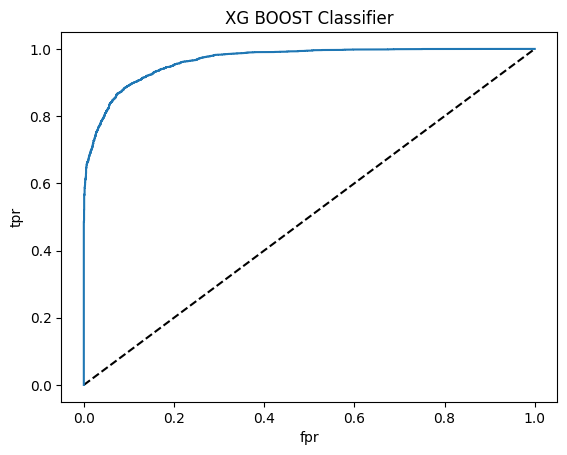

In [92]:
# Checking ROC_AUC Curve

y_pred_prob = XG_SEL.predict_proba(x_test)[:, 1]

# 0 & others

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob, pos_label = 1)

import matplotlib.pyplot as mpp

mp.plot([0,1],[0,1], 'k--')
mp.xlabel('fpr')
mp.ylabel('tpr')
mp.title('XG BOOST Classifier')
mp.plot(fpr,tpr)
mp.show()

# Saving the Best Performing Model

In [93]:
# Saving the best Model

import joblib

# Save Model to predict Income
joblib.dump(XG_SEL, 'XG_income.pkl')

['XG_income.pkl']

In [94]:
# Load the saved model to predict Income

load_XG_IN = joblib.load('XG_income.pkl')
XG_IN = load_XG_IN

In [95]:
# Predictor Function to predict Primary Fuel

def pred_inc(input):

  inp = np.array(input)
  type_inc  =  XG_IN.predict(inp.reshape(1, -1))
  reg_inc = le.inverse_transform(type_inc)
  pred_lst = [type_inc, reg_inc]

  return pred_lst

In [96]:
# Checking the predictions

rws = [3100, 5004, 907, 5103, 1900]

for row in rws:
  print('Actual:', y_df[row])
  print('Predicted by Model:', pred_inc(x_df.iloc[row,:])[0])
  print('Decoded value:', pred_inc(x_df.iloc[row,:])[1])
  print('\n')


Actual: 0
Predicted by Model: [0]
Decoded value: [' <=50K']


Actual: 0
Predicted by Model: [0]
Decoded value: [' <=50K']


Actual: 1
Predicted by Model: [1]
Decoded value: [' >50K']


Actual: 0
Predicted by Model: [0]
Decoded value: [' <=50K']


Actual: 1
Predicted by Model: [1]
Decoded value: [' >50K']




**MODEL SEEMS TO PREDICTING WELL**